In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Опис даних:

squareMeters - житлова площа (м2) </br>
numberOfRooms - кількість кімнат </br>
hasYard </br>
hasPool </br>
floors - number of floors </br>
cityCode - zip code </br>
cityPartRange - the higher the range, the more exclusive the neighbourhood is </br>
numPrevOwners - number of prevoious owners </br>
made - year </br>
isNewBuilt </br>
hasStormProtector </br>
basement - basement square meters </br>
attic - attic square meteres </br>
garage - garage size </br>
hasStorageRoom </br>
hasGuestRoom - number of guest rooms </br>
price - predicted value </br>

### Класифікуємо колонки за природою даних

In [2]:
binary = ["hasYard", 'hasPool','isNewBuilt', 'hasStormProtector','hasStorageRoom']
categorical = ['cityCode']
numerical = ["squareMeters", 'numberOfRooms','floors', 'numPrevOwners', "made", 'basement', 'attic', 'garage', "cityPartRange", 'hasGuestRoom']
target = "price"

In [3]:
data = pd.read_csv("train.csv", index_col = 'id')
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
id,,,,,,,,,,,,,,,,,
0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8


Подивимось кореляцію числових змінних між собою

In [54]:
data[numerical].corr()

,squareMeters,numberOfRooms,floors,numPrevOwners,made,basement,attic,garage,cityPartRange,hasGuestRoom
squareMeters,1.000000,0.090945,0.061193,-0.008295,0.123028,-0.038942,-0.007157,-0.123287,-0.010226,-0.009228
numberOfRooms,0.090945,1.000000,0.077861,0.021848,-0.035153,0.024843,0.025488,0.066361,0.012099,-0.015995
floors,0.061193,0.077861,1.000000,0.018478,-0.059253,0.010502,0.004035,0.036277,0.007335,-0.033042
numPrevOwners,-0.008295,0.021848,0.018478,1.000000,0.016034,-0.007518,0.001145,-0.005037,0.021512,0.013142
made,0.123028,-0.035153,-0.059253,0.016034,1.000000,0.034318,0.025590,0.032858,0.009661,0.023988
basement,-0.038942,0.024843,0.010502,-0.007518,0.034318,1.000000,0.022049,-0.019474,-0.001041,0.018266
attic,-0.007157,0.025488,0.004035,0.001145,0.025590,0.022049,1.000000,-0.032594,0.007104,0.014161
garage,-0.123287,0.066361,0.036277,-0.005037,0.032858,-0.019474,-0.032594,1.000000,-0.001295,0.005211
cityPartRange,-0.010226,0.012099,0.007335,0.021512,0.009661,-0.001041,0.007104,-0.001295,1.000000,0.018345
hasGuestRoom,-0.009228,-0.015995,-0.033042,0.013142,0.023988,0.018266,0.014161,0.005211,0.018345,1.000000


In [55]:
binary

['hasYard', 'hasPool', 'isNewBuilt', 'hasStormProtector', 'hasStorageRoom']

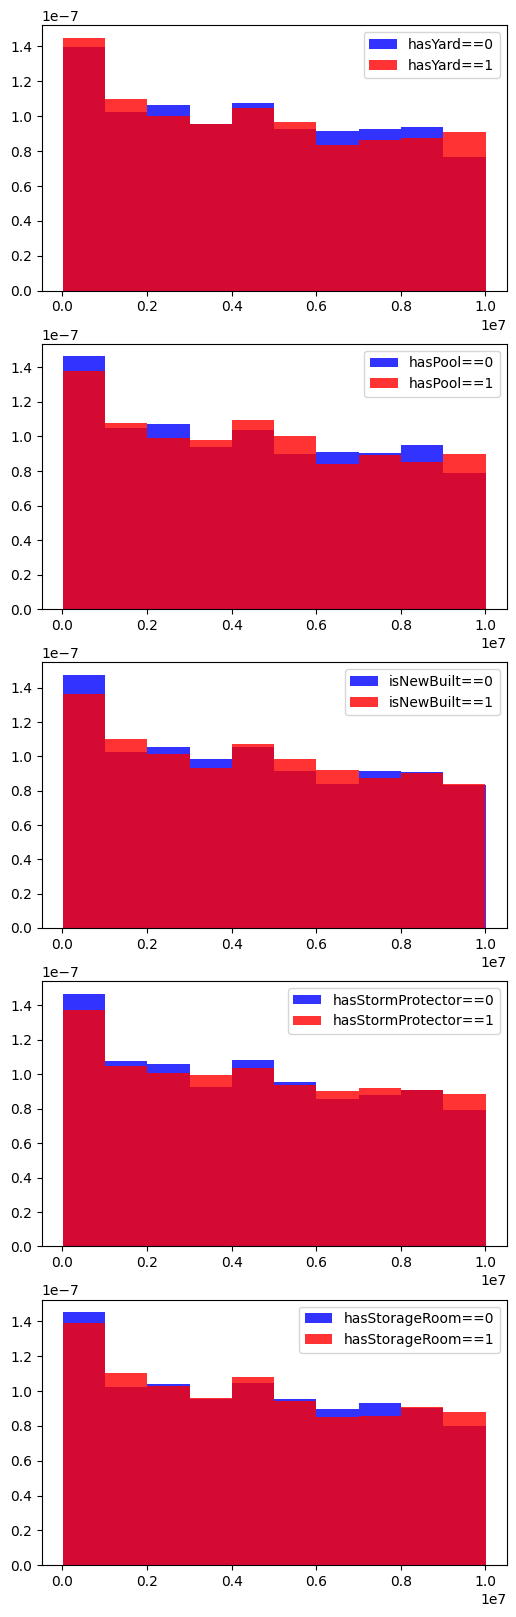

In [53]:
fig, axs = plt.subplots(len(binary), figsize = (6, 4*len(binary)))

for i, col in enumerate(binary):
    axs[i].hist(data[data[col]==0]['price'], color = 'blue', alpha=0.8, density = True, label = f'{col}==0'); axs[i].legend()
    axs[i].hist(data[data[col]==1]['price'], color = 'red', alpha=0.8, density = True, label = f'{col}==1'); axs[i].legend()

In [47]:
for i, col in enumerate(binary):
    print()
    print(col)
    df = pd.DataFrame()
    df['0'] = data[data[col]==0]['price'].describe()
    df['1'] = data[data[col]==1]['price'].describe()
    print(df)


hasYard
                  0             1
count  1.189700e+04  1.081300e+04
mean   4.640865e+06  4.625845e+06
std    2.898803e+06  2.954467e+06
min    1.031350e+04  1.031350e+04
25%    2.088001e+06  1.954997e+06
50%    4.478515e+06  4.402358e+06
75%    7.145472e+06  7.173346e+06
max    1.000428e+07  1.000428e+07

hasPool
                  0             1
count  1.242600e+04  1.028400e+04
mean   4.617500e+06  4.653305e+06
std    2.928720e+06  2.921370e+06
min    1.031350e+04  1.031350e+04
25%    1.996975e+06  2.073104e+06
50%    4.425952e+06  4.473670e+06
75%    7.160666e+06  7.159281e+06
max    1.000428e+07  1.000428e+07

isNewBuilt
                  0             1
count  1.208100e+04  1.062900e+04
mean   4.611504e+06  4.658958e+06
std    2.938400e+06  2.910451e+06
min    1.031350e+04  1.031350e+04
25%    2.006911e+06  2.061341e+06
50%    4.392044e+06  4.509900e+06
75%    7.175060e+06  7.129401e+06
max    1.000428e+07  9.999687e+06

hasStormProtector
                  0             1

Подивимось на кореляцію ціни житла та інших числових змінних

In [6]:
data[numerical].corrwith(data[target]).sort_values(ascending = False)

squareMeters     0.591749
numberOfRooms    0.091681
floors           0.038374
made             0.024270
attic           -0.006851
numPrevOwners   -0.008546
hasGuestRoom    -0.009309
cityPartRange   -0.009366
basement        -0.034940
garage          -0.120137
dtype: float64

Описові характеристики

In [7]:
data[numerical].describe()

,squareMeters,numberOfRooms,floors,numPrevOwners,made,basement,attic,garage,cityPartRange,hasGuestRoom
count,2.273000e+04,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000
mean,4.658622e+04,48.241091,47.305983,5.620766,2008.005059,5283.646634,5067.981698,530.469644,5.585042,5.153058
std,4.952124e+04,28.226428,47.777207,2.713026,118.826777,3047.084412,3097.347939,274.840604,2.739533,3.055246
min,8.900000e+01,1.000000,1.000000,1.000000,1990.000000,4.000000,1.000000,4.000000,1.000000,0.000000
25%,2.039275e+04,25.000000,25.000000,3.000000,2000.000000,2977.250000,2599.000000,297.000000,3.000000,3.000000
50%,4.448400e+04,47.000000,45.000000,6.000000,2006.000000,5359.000000,4977.000000,515.000000,6.000000,5.000000
75%,7.154700e+04,75.000000,69.000000,8.000000,2014.000000,7746.000000,7652.000000,767.000000,8.000000,8.000000
max,6.071330e+06,100.000000,6000.000000,10.000000,10000.000000,91992.000000,96381.000000,9017.000000,10.000000,10.000000


На графіку можна побачити точки, що вибиваються із загальної картини:

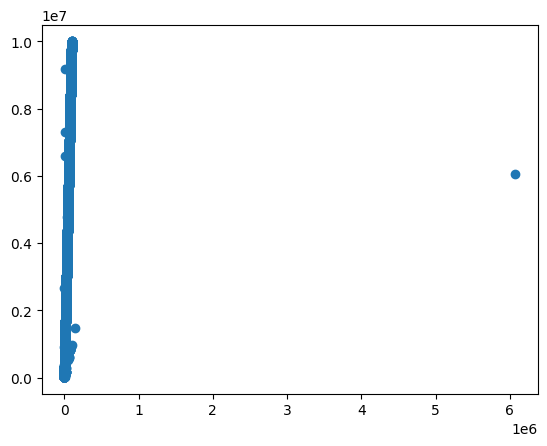

In [8]:
plt.scatter(data['squareMeters'], data['price'])

Точки-викиди можна прибрати, якщо загнати числові змінні у "правило трьох сігм" (mean - 3std, mean + 3std)

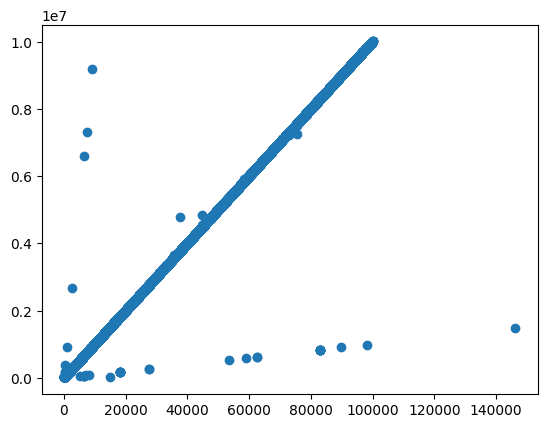

In [9]:
plt.scatter(data['squareMeters'][data['squareMeters']<196000], data['price'][data['squareMeters']<196000])

Видалимо точки-викиди із даних:

In [10]:
for col in numerical:
    mean, std, min_d, max_d = data[col].mean(), data[col].std(), data[col].min(), round(data[col].max(),3)
    #print(f"col={col}, min={min_d}, max={max_d}, mean-3std = {mean-3*std}, mean+3std = {mean+3*std}")
    data = data[(data[col]>=mean-3*std) & (data[col]<=mean+3*std)]
    print(len(data))

22729
22729
22728
22728
22723
22719
22712
22710
22710
22710


Подібно до corrwith, побудуємо графіки залежності числових змінних із цільовою

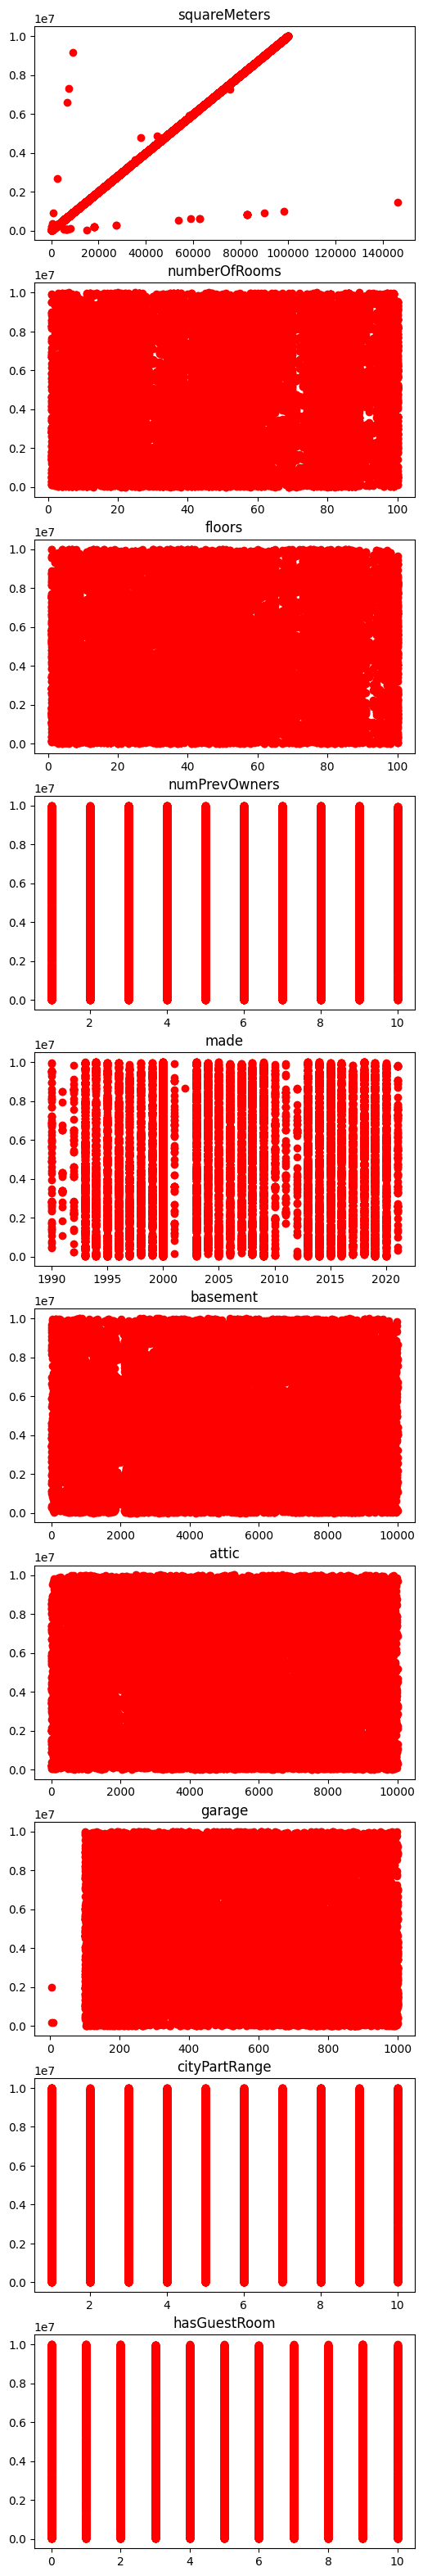

In [11]:
fig, axs = plt.subplots( len(numerical), figsize=(6, 4*len(numerical)))

df_sample = data
for i, col in enumerate(numerical):
    axs[i].scatter(df_sample[col], df_sample[target], color='red'); axs[i].set_title(col)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data.drop(columns=[target]), data[target])

X_train.shape, X_val.shape

((17032, 16), (5678, 16))

Перша модель - лінійна регресія на житлову площу (регресія без вільного члена)

$ price = \beta_0 squareMeters $

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=False)
lr.fit(X_train[['squareMeters']], y_train)

LinearRegression(fit_intercept=False)

In [14]:
lr.coef_

array([100.00151569])

price ~ 99.9 * squareMeters

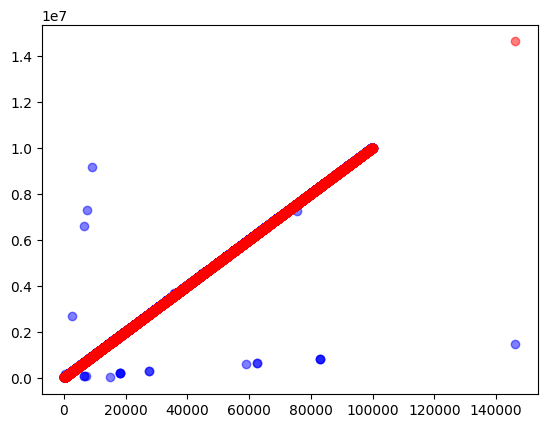

In [15]:
plt.scatter(X_train['squareMeters'], y_train, color='blue', alpha=0.5)
plt.scatter(X_train['squareMeters'], lr.predict(X_train[['squareMeters']]), color='red', alpha=0.5)

In [16]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

mae(y_train, lr.predict(X_train[['squareMeters']])), mae(y_val, lr.predict(X_val[['squareMeters']]))

(11533.81700458213, 15438.620457162651)

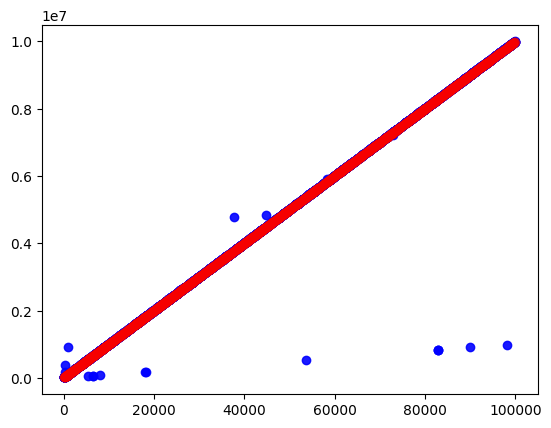

In [17]:
plt.scatter(X_val['squareMeters'], y_val, color='blue', alpha=0.9)
plt.scatter(X_val['squareMeters'], lr.predict(X_val[['squareMeters']]), color='red', alpha=0.1)

In [18]:
#def fit(X, y):
#    return np.linalg.inv(X.T @ X) @ X.T @ y

$ price = \beta_0 + \beta_1 square $

In [19]:
from sklearn.linear_model import LinearRegression

lr_bias = LinearRegression(fit_intercept=True)
lr_bias.fit(X_train[['squareMeters']], y_train)

LinearRegression()

In [20]:
0, lr.coef_ #price = 99.9 * squareMeters

(0, array([100.00151569]))

In [21]:
lr_bias.intercept_, lr_bias.coef_ #price = 13347 + 99.73 * squareMeters

(12849.246103600599, array([99.80300859]))

In [22]:
y_val_pred = lr.predict(X_val[['squareMeters']])
y_val_predbias = lr_bias.predict(X_val[['squareMeters']])

$ MSE = \sum (y - a(x))^2 $

In [23]:
mse(y_val, y_val_pred) > mse(y_val, y_val_predbias)

True

In [24]:
X_val['squareMeters'].describe()

count     5678.000000
mean     46078.042973
std      29490.718227
min        111.000000
25%      19729.000000
50%      43937.000000
75%      71710.750000
max      99932.000000
Name: squareMeters, dtype: float64

Третій крок - побудуємо модель на всіх числових колонках

In [25]:
lr3 = LinearRegression(fit_intercept=True)
lr3.fit(X_train[numerical], y_train)

LinearRegression()

In [26]:
numerical, lr3.intercept_, lr3.coef_ #price ~ -441318.244 + 99.69 squareMeters + 131.5 * numebr_of_rooms ... 

(['squareMeters',
  'numberOfRooms',
  'floors',
  'numPrevOwners',
  'made',
  'basement',
  'attic',
  'garage',
  'cityPartRange',
  'hasGuestRoom'],
 -467253.1244674651,
 array([ 9.97657150e+01,  1.17795409e+02,  3.13214090e+01, -5.35631768e+02,
         2.42993156e+02, -2.65470674e-01, -5.01092985e-01, -1.37279847e+01,
         5.52432763e+02, -3.27731515e+02]))

In [27]:
y_val_pred = lr.predict(X_val[['squareMeters']])
y_val_predbias = lr_bias.predict(X_val[['squareMeters']])
y_val_pred3 = lr3.predict(X_val[numerical])

In [28]:
from sklearn.metrics import r2_score

r2_score(y_val, y_val_pred), r2_score(y_val, y_val_predbias), r2_score(y_val, y_val_pred3)

(0.9930757669585156, 0.9930808658848538, 0.9930792235532461)

In [29]:
np.sqrt(mse(y_val, y_val_pred)), np.sqrt(mse(y_val, y_val_predbias)), np.sqrt(mse(y_val, y_val_pred3))

(245463.65462869228, 245373.2596645696, 245402.37894040564)

In [30]:
mae(y_val, y_val_pred),  mae(y_val, y_val_predbias), mae(y_val, y_val_pred3)

(15438.620457162651, 15185.610774603005, 16589.658605314246)

Як висновок - модель на двох параметрах виявилась кращою за модель, побудовану на всіх змінних (змінні треба досліджувати і фільтрувати ті, що найбільш залежні із цільовою)